In [1]:
# from extract_dataframe import read_json
# from extract_dataframe import TweetDfExtractor

In [2]:
# if __name__ == "__main__":
#     _, tweet_list = read_json("Economic_Twitter_Data.json")
#     tweet = TweetDfExtractor(tweet_list)
#     tweet_df = tweet.get_tweet_df() 
# tweet_df

In [3]:
import json
import pandas as pd
from textblob import TextBlob

def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    
    return len(tweets_data), tweets_data

class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    ------
    dataframe
    """
    def __init__(self, tweets_list):
        
        self.tweets_list = tweets_list

    # an example function
    def find_statuses_count(self)->list:
        #create an empty list 
        statuses_count = list()
        
        #iterate through tweets list 
        for x in self.tweets_list:
            #append in created list statuses count
            statuses_count.append(x['user']['statuses_count'])
                                  
    def find_full_text(self)->list:
        
        # create an empty list
        text = []
        for tweets in self.tweets_list:
            if "retweeted_status" in [keys for keys,values in tweets.items()] and "extended_tweet" in tweets['retweeted_status'].keys():
                text.append(tweets['retweeted_status']['extended_tweet']['full_text'])
            else:
                text.append("Empty")
        return text
                                  
         
    def find_sentiments(self, text)->list:
        polarity = []
        subjectivity = []
        for tweets in text:
            blob = TextBlob(tweets)
            sentiment = blob.sentiment
            polarity.append(sentiment.polarity)
            subjectivity.append(sentiment.subjectivity)
        return polarity, subjectivity

    def find_created_time(self)->list:
        created_at = []
        for x in self.tweets_list:
            created_at.append(x['created_at'])
       
        return created_at

    def find_source(self)->list:
        # I can also use list comprehensiom
        source = [x['source'] for x in self.tweets_list]

        return source

    def find_screen_name(self)->list:
        screen_name = []
        for x in self.tweets_list:
            screen_name.append(x['user']['screen_name']) 
        return screen_name
                                  
    def find_followers_count(self)->list:
        followers_count =[]
        for x in self.tweets_list:
            followers_count.append(x['user']['followers_count'])
        return followers_count

    def find_friends_count(self)->list:
        friends_count= []
        for x in self.tweets_list:
            friends_count.append(x['user']['friends_count'])
        return friends_count

    def is_sensitive(self)->list:
        try:
            is_sensitive = []
            for tweets in self.tweets_list:
                if 'possibly_sensitive' in [keys for keys,values in tweets.items()]:
                    is_sensitive.append(tweets['possibly_sensitive'])
                else:
                    is_sensitive.append(0)
                    
        except KeyError:
            is_sensitive = None

        return is_sensitive

    def find_favourite_count(self)->list:
        favorite_count = list()
        for tweets in self.tweets_list:
            if 'retweeted_status' in [keys for keys,values in tweets.items()]:
                favorite_count.append(tweets['retweeted_status']['favorite_count'])
            else:
                favorite_count.append(0)
        return favorite_count
        
    
    def find_retweet_count(self)->list:
        retweet_count = list()
        for tweets in self.tweets_list:
            if 'retweeted_status' in [keys for keys,values in tweets.items()]:
                retweet_count.append(tweets['retweeted_status']['retweet_count'])
            else:
                retweet_count.append(0)
        return retweet_count

    def find_hashtags(self)->list:
        hashtags = []

        for tweets in self.tweets_list:
            hashtags.append(",".join([x['text'] for x in tweets['entities']['hashtags']]))
        return hashtags

    def find_mentions(self)->list:
        mentions = []
        for tweets in self.tweets_list:
            mentions.append( ", ".join([x['screen_name'] for x in tweets['entities']['user_mentions']]))

        return mentions
                                  


    def find_location(self)->list:
        try:
            location = self.tweets_list['user']['location']
        except TypeError:
            location = ''
        
        return location

    def find_lang(self)->list:
        lang = []
        for x in self.tweets_list:
            lang.append(x['lang'])
        return lang
        
        
    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at', 'source', 'original_text','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
            'original_author', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place']
        
        created_at = self.find_created_time()
        source = self.find_source()
        text = self.find_full_text()
        polarity, subjectivity = self.find_sentiments(text)
        lang = self.find_lang()
        fav_count = self.find_favourite_count()
        retweet_count = self.find_retweet_count()
        screen_name = self.find_screen_name()
        follower_count = self.find_followers_count()
        friends_count = self.find_friends_count()
        sensitivity = self.is_sensitive()
        hashtags = self.find_hashtags()
        mentions = self.find_mentions()
        location = self.find_location()
        data = {"created_at":created_at,'source':source,'original_text':text,'polarity':polarity,'subjectivity':subjectivity,
                'lang':lang,'favorite_count':fav_count,'retweet_count':retweet_count,'original_author':screen_name, 
                'followers_count':follower_count,'friends_count':friends_count,'possibly_sensitive':sensitivity,
                'hashtags':hashtags,'user_mentions':mentions}

#         data = zip(created_at, source, text, polarity, subjectivity, lang, fav_count, retweet_count, screen_name, follower_count, friends_count, sensitivity, hashtags, mentions, location)
        df = pd.DataFrame(data, columns=columns)

        if save:
            df.to_csv('processed_tweet_data.csv', index=False)
            print('File Successfully Saved.!!!')
        
        return df

                
if __name__ == "__main__":
    # required column to be generated you should be creative and add more features
    columns = ['created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
    'original_author', 'screen_count', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place', 'place_coord_boundaries']
    _, tweet_list = read_json("Economic_Twitter_Data.json")
    tweet = TweetDfExtractor(tweet_list)
    tweet_df = tweet.get_tweet_df() 

    # use all defined functions to generate a dataframe with the specified columns above

    

In [4]:
tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Empty,-0.1,0.5,de,2356,355,McMc74078966,3,12,0,,nikitheblogger,NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Empty,-0.1,0.5,de,1985,505,McMc74078966,3,12,0,,sagt_mit,NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Empty,-0.1,0.5,de,16,4,McMc74078966,3,12,0,,"Kryptonoun, WRi007",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Empty,-0.1,0.5,de,1242,332,McMc74078966,3,12,0,"Deutschen,Spritpreisen,inflation,Abgaben",WRi007,NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Empty,-0.1,0.5,de,1329,386,McMc74078966,3,12,0,,RolandTichy,NaN


In [5]:
tweet_df.shape

(24625, 15)

In [6]:
class Clean_Tweets:
    """
    The PEP8 Standard AMAZING!!!
    """
    def __init__(self, df:pd.DataFrame):
        self.df = df
        print('Automation in Action...!!!')
        
    def drop_unwanted_column(self, df:pd.DataFrame)->pd.DataFrame:
        """
        remove rows that has column names. This error originated from
        the data collection stage.  
        """
        unwanted_rows = df[df['retweet_count'] == 'retweet_count' ].index
        df.drop(unwanted_rows , inplace=True)
        df = df[df['polarity'] != 'polarity']
        
        return df
    def drop_duplicate(self, df:pd.DataFrame)->pd.DataFrame:
        """
        drop duplicate rows
        """
        self.df = self.df.drop_duplicates().drop_duplicates(subset='original_text')
        
        return df
    def convert_to_datetime(self, df:pd.DataFrame)->pd.DataFrame:
        """
        convert column to datetime
        """
        self.df['created_at'] = pd.to_datetime(self.df['created_at'], errors='coerce')
        
        df = df[df['created_at'] >= '2020-12-31' ]
        
        return df
    
    def convert_to_numbers(self, df:pd.DataFrame)->pd.DataFrame:
        """
        convert columns like polarity, subjectivity, retweet_count
        favorite_count etc to numbers
        """
        
        # convert polarity column to numeric, coerce for setting Invalid parsing to nan
        df['polarity'] = pd.to_numeric(self.df['polarity'],errors="ignore")
        
        # same applies to other column
        df['subjectivity'] = pd.to_numeric(self.df['subjectivity'], errors="ignore")
        
        # putting square bracket while extracting column is the same putting a dot 
        df['favorite_count'] = pd.to_numeric( self.df.favorite_count, errors= "ignore")
        
        df['retweet_count'] = pd.to_numeric(self.df.retweet_count, errors="ignore")
        
        return df
    
    def remove_non_english_tweets(self, df:pd.DataFrame)->pd.DataFrame:
        """
        remove non english tweets from lang
        """
        # we use query function to query tweets whereby lang(language) = en(english)
        df = self.df.query("lang == 'en'")
        
        return df

In [7]:
r = Clean_Tweets(tweet_df)

Automation in Action...!!!


In [8]:
df = r.remove_non_english_tweets(tweet_df)

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

<ipython-input-9-2c0f50f715ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [10]:
df = df[df['created_at'] >= '2020-12-31' ]

In [11]:
df['polarity'] = pd.to_numeric(df['polarity'],errors="ignore")
        
# same applies to other column
df['subjectivity'] = pd.to_numeric(df['subjectivity'], errors="ignore")

# putting square bracket while extracting column is the same putting a dot 
df['favorite_count'] = pd.to_numeric( df.favorite_count, errors= "ignore")

df['retweet_count'] = pd.to_numeric(df.retweet_count, errors="ignore")


In [12]:
df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
38,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",Empty,-0.1,0.5,en,188,43,davideiacovozzi,18,55,0,"gold,silver,crypto",NorthstarCharts,NaN
39,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",Empty,-0.1,0.5,en,179,32,davideiacovozzi,18,55,0,,MichaelAArouet,NaN
41,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",Empty,-0.1,0.5,en,193,26,davideiacovozzi,18,55,False,,goldseek,NaN
42,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",Empty,-0.1,0.5,en,620,213,davideiacovozzi,18,55,0,,charliebilello,NaN
43,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",Empty,-0.1,0.5,en,1787,417,davideiacovozzi,18,55,False,,biancoresearch,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24584,2022-04-22 15:22:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Empty,-0.1,0.5,en,2924,300,kitukalesatya,706,643,0,,"CHARANJITCHANNI, RajaBrar_INC, BB__Ashu",NaN
24586,2022-04-22 15:22:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Empty,-0.1,0.5,en,14671,5006,kitukalesatya,706,643,0,,"pbhushan1, BajpayeeManoj",NaN
24596,2022-04-22 15:01:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Empty,-0.1,0.5,en,5056,973,kitukalesatya,706,643,False,,s_shreyatweets,NaN
24599,2022-04-22 14:58:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Empty,-0.1,0.5,en,636,115,kitukalesatya,706,643,False,,tejjINC,NaN


# EDA

In [13]:
a = df.corr()

In [14]:
b = a.iloc[2:,2:]

<AxesSubplot:>

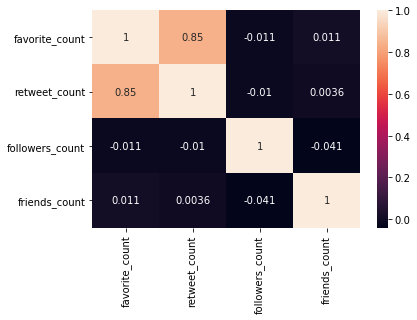

In [15]:
import seaborn as sns
sns.heatmap(b, annot = True)

In [16]:
len(df['user_mentions'].unique())

7217

In [17]:
df.isnull().sum()

created_at                0
source                    0
original_text             0
polarity                  0
subjectivity              0
lang                      0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive        0
hashtags                  0
user_mentions             0
place                 16374
dtype: int64

In [18]:
df.drop("place",axis=1,inplace=True)

In [19]:
columns = []
length = []
for i in df.columns:
    columns.append(i)
    length.append(len(df[i].unique()))

In [20]:
dict_={}
r = []
for i,j in zip(columns,length):
    dict_[i] = j
    r.append(dict_)

In [21]:
r_ = r[0]
r_

{'created_at': 15675,
 'source': 53,
 'original_text': 1,
 'polarity': 1,
 'subjectivity': 1,
 'lang': 1,
 'favorite_count': 2550,
 'retweet_count': 1716,
 'original_author': 464,
 'followers_count': 426,
 'friends_count': 394,
 'possibly_sensitive': 2,
 'hashtags': 3213,
 'user_mentions': 7217}

In [22]:
r = pd.DataFrame(r_,index=[0])

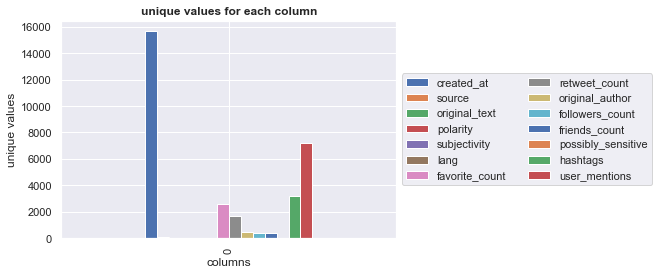

In [23]:
import matplotlib.pyplot as plt
sns.set()
r.plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=2)
plt.title("unique values for each column",fontweight="bold")
plt.xlabel("columns")
plt.ylabel("unique values");

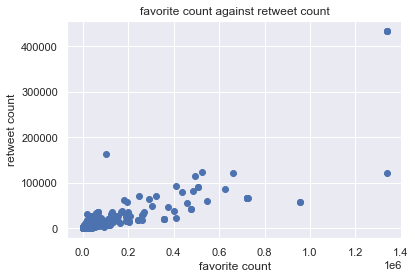

In [24]:
plt.scatter(df['favorite_count'],df['retweet_count'])
plt.title("favorite count against retweet count")
plt.xlabel("favorite count")
plt.ylabel("retweet count");

In [25]:
import numpy as np
df['hashtags'] = df['hashtags'].replace('',np.NaN)

In [26]:
a = list(df['hashtags'].unique())
a.remove(np.NaN)


In [27]:
hashtags = []
values = []
for i in a:
    a = df[df['hashtags']==i]
    hashtags.append(i)
    values.append(len(a))
    

In [28]:
d = []
D = {}
for i,j in zip(hashtags,values):
    D[i] = j
    d.append(D)

In [29]:
w = d[0]

In [30]:
sort_orders = sorted(w.items(), key=lambda x: x[1], reverse=True)

In [31]:
e = []
t = []
for i in sort_orders:
    e.append(i[0])
    t.append(i[1])

In [32]:
t[0:10]

[102, 71, 43, 41, 37, 32, 31, 31, 29, 25]

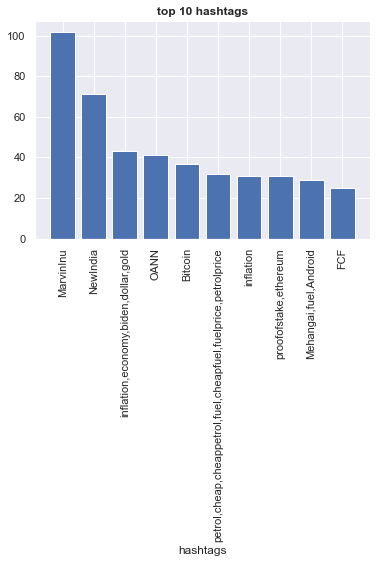

In [33]:
plt.bar(e[0:10],t[0:10])
plt.xticks(rotation=90)
plt.xlabel("hashtags")
plt.title("top 10 hashtags",fontweight="bold");

In [34]:
v = list(df['original_author'].unique())

In [35]:
authors = []
values_auth = []
for i in v:
    a = df[df['original_author']==i]
    authors.append(i)
    values_auth.append(len(a))
authors    

['davideiacovozzi',
 'MercuryReports',
 'MaatWes',
 'gfliverpool9966',
 'ZoeyZoeAz',
 'TContester',
 'Cannonballs17',
 'sidd_sanap',
 'LindaSFroiland',
 'rasp_test',
 'Lone_Commoner',
 'SocapRetweeted',
 'xenon__07',
 '3osVyJVKJ0cOtVu',
 'I_dont_care_4it',
 'RealMikeFusco',
 'i9theghost5',
 'rashidaldosari',
 'SerdarKsdli',
 'OffensivelyP',
 'MrS0ndheim',
 'JackAllLanterns',
 'socialistsrise',
 'libsocorgofcan',
 '4_localpolice',
 'akaider',
 'LJOptions',
 'XGemTrader',
 'BostonRoca',
 'MZimmermannAT',
 'whisper87464578',
 'johnfcarter',
 'resist_will',
 'ASBrokerage',
 'OANN',
 'Hutt000',
 'AndrewHolmes01',
 'pam5314Jones',
 'stat_world',
 'econotw',
 'YoureEitherSer1',
 'RoryMcEwan3',
 'ray_hessel',
 'ICIS_Al',
 'Paul_Gaspais',
 'dhienos',
 'RalphLindy1',
 'iCEDthis',
 'JeanyKingsman',
 'AndrTremblay20',
 'SCVIndy',
 'WithyGrove',
 'tauhenare',
 'eliceami',
 'AilsaForshaw',
 '_Christie_lynn_',
 'CindyHendren2',
 'Boutonski',
 'Libertad_Tejas',
 'sbcgold',
 'xglobalmarkets',
 'wranitz

In [36]:
p = []
t = {}
for i,j in zip(authors,values_auth):
    t[i] = j
    p.append(t)

In [37]:
sort_orders_ = sorted(p[0].items(), key=lambda x: x[1], reverse=True)

In [38]:
sort_orders_

[('MaatWes', 50),
 ('MrS0ndheim', 50),
 ('whisper87464578', 50),
 ('johnfcarter', 50),
 ('ASBrokerage', 50),
 ('stat_world', 50),
 ('ray_hessel', 50),
 ('sbcgold', 50),
 ('xglobalmarkets', 50),
 ('stock_selector', 50),
 ('pastexpiry', 50),
 ('CaFiatEmptor', 50),
 ('GETAnalysis', 50),
 ('EpochTimes', 50),
 ('artofkaizen', 50),
 ('wbznewsradio', 50),
 ('wbzSausville', 50),
 ('vantagepoint', 50),
 ('lanemen', 50),
 ('Stansberry', 50),
 ('zaizaiUmar', 50),
 ('BirchGold', 50),
 ('dowfornm', 50),
 ('RazaCPACGA', 50),
 ('bowserbuddy711', 50),
 ('SBL_UEL', 50),
 ('MehangaiApp', 50),
 ('lineappofficial', 50),
 ('Maxi_Group_LLC', 50),
 ('Monge23crypto', 50),
 ('AlertCaribbean', 50),
 ('36Kr', 50),
 ('Sasuke_Jnr', 50),
 ('JaWo1245', 50),
 ('Moon50097307', 50),
 ('john_jay31', 50),
 ('allindiatweet', 50),
 ('RHADeclan', 50),
 ('NCET_Pak', 50),
 ('Londonwanderer2', 50),
 ('GardenG1rl', 50),
 ('moneycontrolcom', 50),
 ('dt_next', 50),
 ('amiya_rbehera', 50),
 ('onfleet', 50),
 ('RewardStrategy', 50)

In [39]:
m = []
n = []
for i in sort_orders_:
    m.append(i[0])
    n.append(i[1])

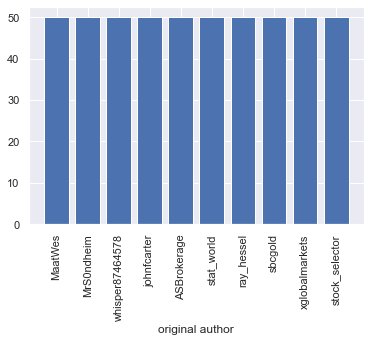

In [40]:
plt.bar(m[0:10],n[0:10])
plt.xticks(rotation=90)
plt.xlabel("original author");